<a href="https://colab.research.google.com/github/Guuuggs/CANTILEVER/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing important libraries and filest**

In [4]:
!pip install imblearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

### Loading the dataset from drive

In [5]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive', force_remount=True)

file_path = "/content/drive/My Drive/creditcard.csv"

# Inspect the file content
with open(file_path, "r") as file:
    content = file.read()
    print("First 500 characters of the file:\n", content[:500])  # Print the first 500 characters to inspect

# If the file has content, try reading it with pandas
if content.strip():  # Ensure the file is not empty
    try:
        df = pd.read_csv(file_path)
        print(df.head())
        print(df.shape)
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
    except pd.errors.EmptyDataError as e:
        print(f"EmptyDataError: {e}")
else:
    print("The file is empty or not correctly formatted.")



Mounted at /content/drive
First 500 characters of the file:
 Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,0.207971242,0.02579058,0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62,0
0,1.191857111,0.266150712
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.54

## Explanatory Data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [8]:
df.shape

(284807, 31)

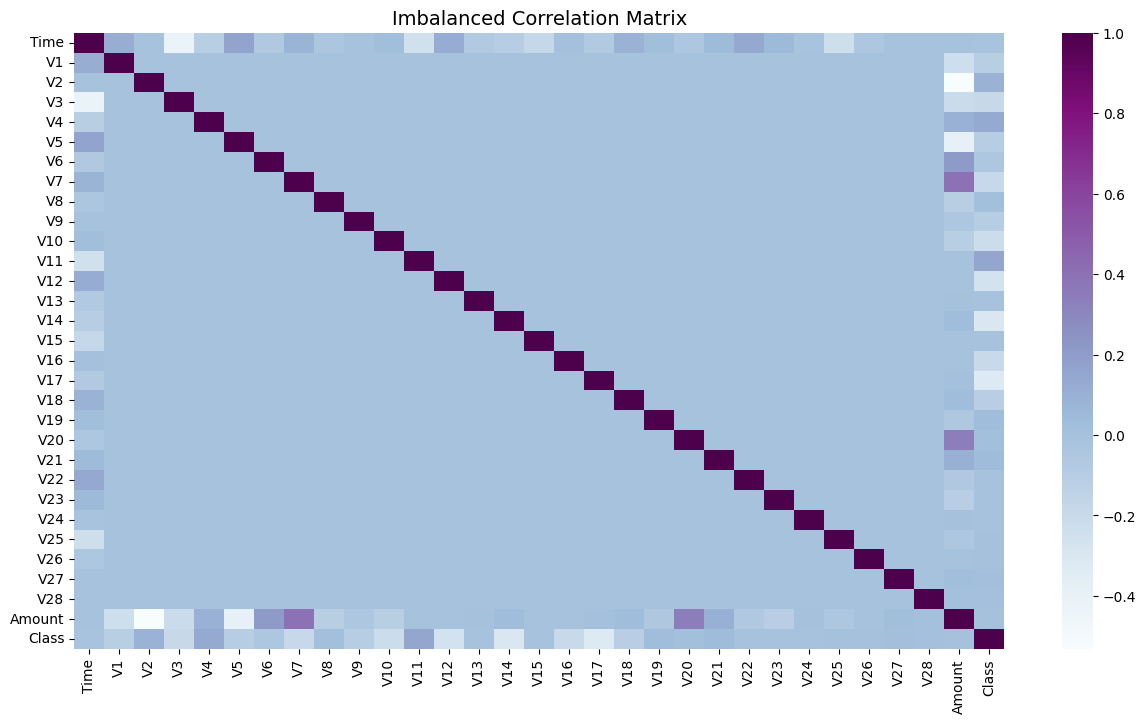

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr, cmap="BuPu", ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

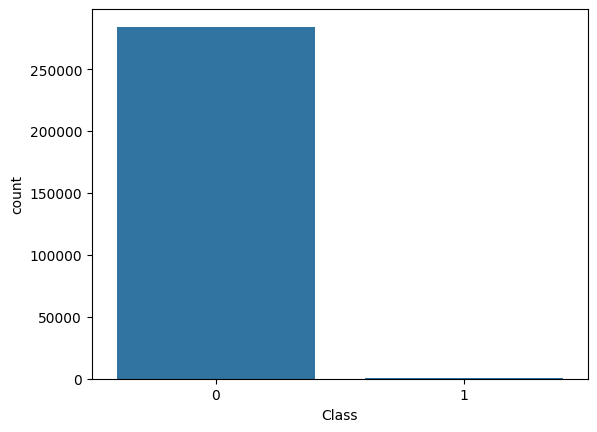

In [10]:
sns.countplot(x="Class", data=df)
plt.show()

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

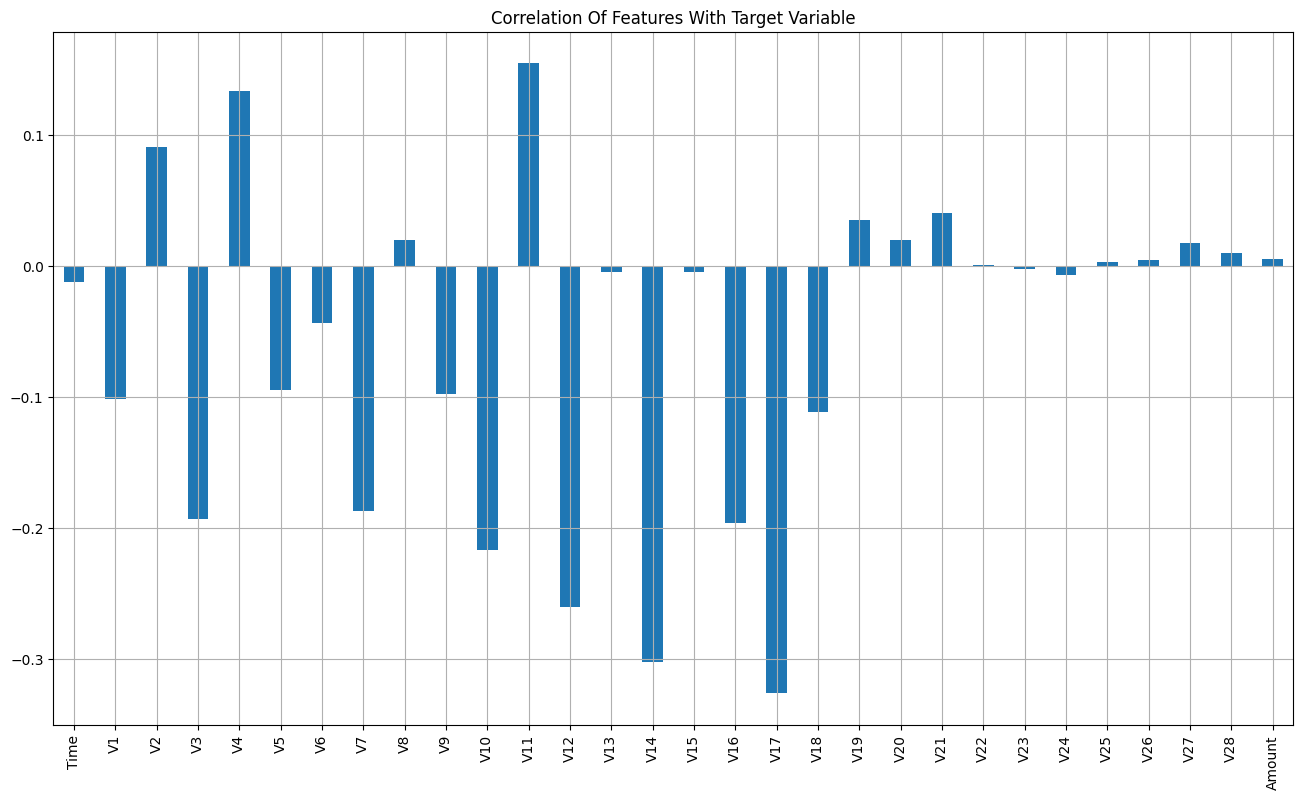

In [11]:
x = df.corr()['Class'][:30]

# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

## Handling the imbalanced data

In [12]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
legit['Class'].unique()

array([0])

In [13]:
legit.shape

(284315, 31)

In [14]:
fraud.shape

(492, 31)

In [15]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


In [16]:
downsampled_df.shape


(984, 31)

In [17]:
legit_sample = legit.sample(n=fraud.shape[0])
legit_sample.head()
legit_sample.shape

(492, 31)

In [18]:
df = pd.concat([legit_sample, fraud], axis=0)
df.shape

(984, 31)

In [19]:
!pip install plotly
import plotly.express as px

Class
0    492
1    492
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

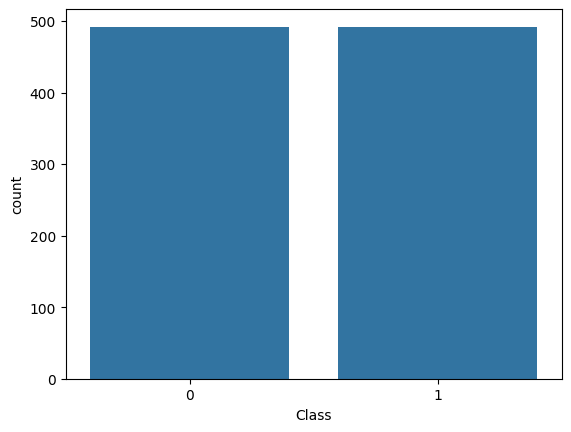

In [20]:
newcount = df['Class'].value_counts()
print(newcount)

# Re-observing ratio of 'Legitimate' vs 'Fraudulent'.
fig = px.bar(newcount, x=newcount.index, y=newcount.values,
             labels={'x': 'Class', 'y': 'Count'},
             title='Legitimate (0) vs Fraudulent (1)')
fig.show()

# Create a count plot to visualize the distribution of classes in the 'Class' column of the downsampled DataFrame downsampled_df
sns.countplot(x='Class', data=downsampled_df)

In [21]:
# Ploting transaction time density.
import plotly.figure_factory as ff # Import the plotly.figure_factory module and alias it as ff
import plotly.offline as py
from plotly.offline import iplot
def plot_time_density(data):
    class_0 = df.loc[data['Class'] == 0]["Time"]
    class_1 = df.loc[data['Class'] == 1]["Time"]

    hist_data = [class_0, class_1]
    group_labels = ['Legitimate (0) | Not Fraud', 'Fraud (1) | Fraud']

    fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
    fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time (s)'))
    iplot(fig)

In [22]:
plot_time_density(df)

###  **Preparing the data **
for this project, we won't be using the time attribute, so we will remove it.

We will also use StandardScaler() to put all the data into the same scale, avoiding bias for a certain attribute when trying to predict our target variable, which is Class.

In [23]:
df = df.drop(columns = ['Time'], axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143428,-10.495109,10.427504,-8.863793,0.126976,-3.685337,-2.663607,-2.890169,4.426314,4.631953,7.476415,...,-0.856219,-0.614972,1.040677,-0.085708,1.269966,-0.439025,0.653471,-0.647776,0.89,0
127383,-1.033684,1.317406,1.240114,0.697731,-0.237730,-0.626897,0.088513,0.433316,-0.773460,-0.479028,...,-0.186250,-0.581192,-0.059505,0.379718,0.025610,0.292520,0.014281,-0.057068,2.69,0
110548,-0.253444,1.064294,0.692188,-0.260712,0.666033,-0.169106,0.705412,0.022245,-0.278548,-0.513082,...,-0.352931,-0.960520,-0.166325,-1.073593,0.024073,0.158946,0.239891,0.084279,12.00,0
261470,-0.426488,1.679544,-2.977042,-0.916375,1.054361,-0.363041,0.815049,-2.800498,-1.076181,-0.891048,...,-0.805116,1.941289,0.206524,0.161563,-1.084715,0.662645,0.367534,0.325033,113.74,0
222672,2.039831,-0.665119,-2.111864,-1.819629,0.487709,-0.281146,0.143033,-0.170772,1.408364,-0.792840,...,-0.198104,-0.482231,0.045186,-0.317680,0.137305,-0.397684,-0.035688,-0.061464,66.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [24]:
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size= .2, random_state = 123)

Now, let's split our data into training set and testing set. I'll split them into a 80/20 proportion, where 80% of our data will be used for training while the 20% left will be used for testing.

In [25]:

print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (227845, 30)
X Test size:  (56962, 30)
X Test proportion  20%


In [26]:
X = df.drop(columns=['Class'], axis=1)
y = df.Class

y

143428    0
127383    0
110548    0
261470    0
222672    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [27]:
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

Y Train size:  (227845,)
Y Test size:  (56962,)
Y Test proportion  20%


In [28]:
train_y.value_counts()

Class
0    227468
1       377
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))
train_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
99168,66999.0,-0.866221,-0.919624,2.020857,-1.525794,-1.035785,2.157966,-0.281997,0.608243,-0.595195,...,0.658829,0.511087,1.154578,-0.070794,-1.678518,0.511949,0.159084,0.044666,0.063497,0.556248
69460,53439.0,0.967267,-0.179598,0.315800,1.354288,-0.273647,0.139429,-0.005874,0.174708,0.195502,...,-0.090995,-0.015079,-0.078930,-0.131669,-0.001284,0.565061,-0.334174,0.013635,0.017108,-0.002494
71073,54140.0,-0.415673,1.080659,0.675844,0.789318,0.158613,0.430765,0.135873,0.671417,-1.000854,...,-0.163889,0.287891,0.782205,0.004812,-0.271442,-0.301717,-0.287004,-0.015223,-0.034233,-0.287905
275238,166438.0,2.036473,-0.021870,-1.085398,0.500278,-0.106741,-1.226224,0.187898,-0.399751,0.320678,...,-0.139006,0.159477,0.583649,0.091193,0.111583,0.003484,0.378828,-0.055797,-0.056548,-0.283389
208891,137318.0,-4.420316,-3.367604,3.339102,6.050951,2.641524,0.359443,-4.793559,-1.765357,-0.387127,...,0.174084,-1.341109,1.123252,-0.526044,0.180769,0.032032,0.687107,0.850304,-0.142814,0.154413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,129714.0,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.027016,0.011921,...,-0.011516,0.523933,1.560949,0.059730,0.131521,-0.145999,0.012917,0.012268,-0.054809,-0.261800
17730,28869.0,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,...,0.177503,-0.090529,-0.491079,-0.179921,1.004741,0.317712,0.281484,0.153761,0.062423,-0.327162
28030,34819.0,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,...,-0.212507,-0.048241,-0.201293,0.053427,0.027638,0.321256,-0.042526,0.001532,0.021002,-0.303394
277869,167907.0,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,-0.200477,0.678971,...,0.276758,-0.100809,-0.465458,-0.063594,-0.580315,-0.080220,-0.101500,-0.043508,-0.001004,0.457096


In [30]:
y.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [31]:
y.value_counts() # 0 = Genuine Transactions | 1 = Fraud

from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y) # Reshaping data
train_y.value_counts()

Class
0    227468
1    227468
Name: count, dtype: int64

In [32]:
# Scaling data on the testing set
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))
test_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
73129,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,-0.066304,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,-0.155568
229597,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0.124636,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,-0.122318
220218,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,0.173336,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,0.459555
198374,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,-0.350968,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,-0.022568
167980,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,0.176958,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,0.026267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65068,51418.0,1.207025,-0.129626,-1.344997,-0.525871,2.145811,3.145669,-0.231371,0.733719,-0.236602,...,0.136111,-0.516048,-1.839854,0.173206,0.959056,0.231778,-0.119999,-0.052622,0.022015,-0.097381
200729,133553.0,2.017278,0.577249,-2.158573,1.560035,0.849581,-1.171057,0.684077,-0.366982,0.070399,...,-0.238868,-0.016630,0.183256,0.057899,0.968540,0.441221,-0.544933,0.001884,-0.019186,-0.359223
166463,118097.0,1.879394,-1.442847,-0.967030,-1.262541,-0.131490,1.716847,-1.277979,0.573770,-0.081713,...,0.076891,0.083654,0.072296,0.339590,-0.982962,-0.681282,-0.411066,0.033190,-0.046916,0.039775
227195,144970.0,0.068710,-0.013893,0.699217,-1.006450,-0.746097,-0.325359,0.361179,-0.553962,-0.434278,...,-0.559609,-0.550267,-0.805616,0.472066,-0.025536,-1.301072,0.109885,-0.595693,-0.194658,-0.072859


In [33]:
x

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

In [34]:
train_y.value_counts()

Class
0    227468
1    227468
Name: count, dtype: int64

In [35]:
test_y.value_counts()

Class
0    56847
1      115
Name: count, dtype: int64

In [36]:
from imblearn.over_sampling import ADASYN
from collections import Counter
ada = ADASYN(sampling_strategy='minority', random_state=123)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(train_x, train_y)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({0: 227468, 1: 227468})
Shape of X_adasampled: (454936, 30)
Shape of Y_adasampled: (454936,)


Now we have a 50 | 50 data balance between genuine and fraudulent transactions.

Note: I've only corrected the imbalance between transactions in the training set, while maintaining the test set with its original proportions, because the test set should be a representation of reality.
with inflated number of training cases

### Applying Classifying Models

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Applying Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators =100, random_state = 42)
random_forest.fit(train_x,train_y)

y_predictions_rf = random_forest.predict(test_x)

# Applying Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(train_x,train_y)

y_predictions_dt = decision_tree.predict(test_x)

# Applying Ada Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(train_x,train_y)

y_predictions_ab = ada_boost.predict(test_x)

# Applying Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_y)

y_prediction_gb = gradient_boosting.predict(test_x)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score

## Random forest model evaluation




In [43]:
# Printing Evaluation Metrics for Random Forest
metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_rf))],
                         ['Precision',precision_score(test_y, y_predictions_rf)],
                         ['Recall', recall_score(test_y, y_predictions_rf)],
                         ['F1_score',f1_score(test_y, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999403
1,Precision,0.846154
2,Recall,0.860870
3,F1_score,0.853448


In [44]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(random_forest, test_x, test_y)

Accuracy: 0.999403110845827
ROC AUC: 0.9739985514129842

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.85      0.86      0.85       115

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
from sklearn.metrics import confusion_matrix

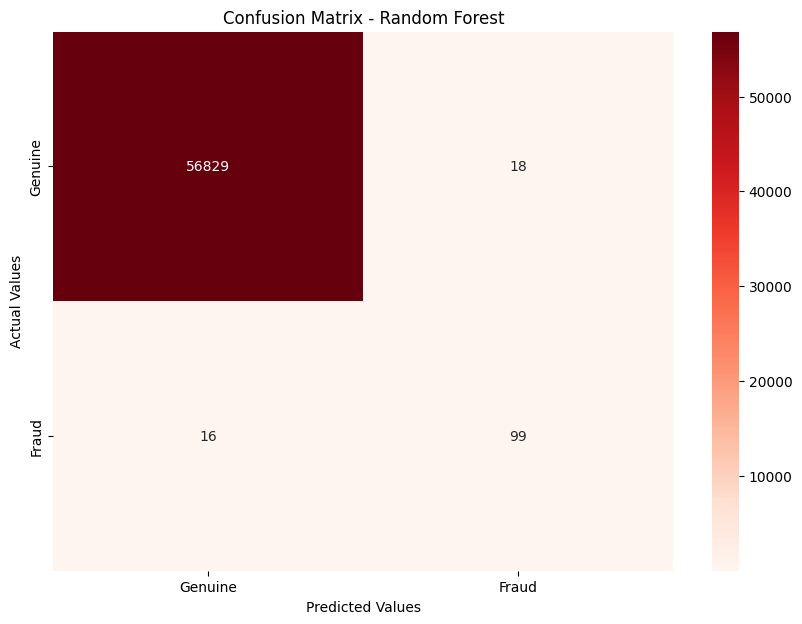

In [61]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf,cmap='Reds', annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

## Decision tree model evaluation

In [48]:
evaluate_model(decision_tree, test_x, test_y)

Accuracy: 0.9979635546504687
ROC AUC: 0.890503953785944

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.50      0.78      0.61       115

    accuracy                           1.00     56962
   macro avg       0.75      0.89      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [63]:
# Printing Evaluation Metrics for Decision Tree
metrics_df = [['Accuracy',(accuracy_score(test_y, y_predictions_dt))],
                         ['Precision',precision_score(test_y, y_predictions_dt)],
                         ['Recall', recall_score(test_y, y_predictions_dt)],
                         ['F1_score',f1_score(test_y, y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Metrics', 'Results'])
metrics_df_dt

,Metrics,Results
0,Accuracy,0.997964
1,Precision,0.497238
2,Recall,0.782609
3,F1_score,0.608108


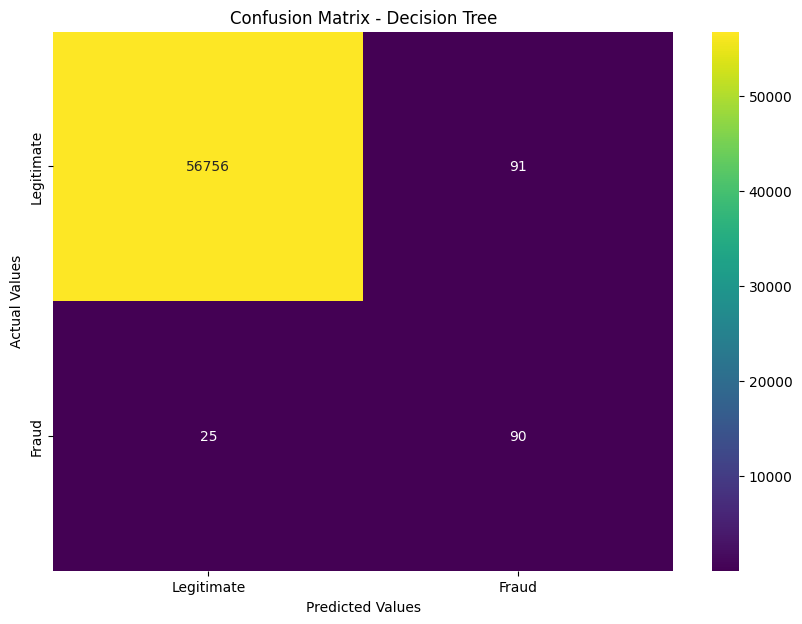

In [52]:
# Confusion Matrix for Decision Tree
conmat_dt = confusion_matrix(test_y, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(conmat_dt, cmap='viridis',annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Legitimate','Fraud'])
ax.yaxis.set_ticklabels(['Legitimate','Fraud'])
plt.show()

## Ada boost model evalution

In [53]:
evaluate_model(ada_boost, test_x, test_y)

Accuracy: 0.9896246620554053
ROC AUC: 0.985448966371213

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56847
           1       0.15      0.91      0.26       115

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [62]:
# Printing Evaluation Metrics for Ada Boost
metrics_ab = [['Accuracy',(accuracy_score(test_y, y_predictions_ab))],
                         ['Precision',precision_score(test_y, y_predictions_ab)],
                         ['Recall', recall_score(test_y, y_predictions_ab)],
                         ['F1_score',f1_score(test_y, y_predictions_ab)]]
metrics_df_ab = pd.DataFrame(metrics_ab, columns = ['Metrics', 'Results'])
metrics_df_ab

,Metrics,Results
0,Accuracy,0.989625
1,Precision,0.153061
2,Recall,0.913043
3,F1_score,0.262172


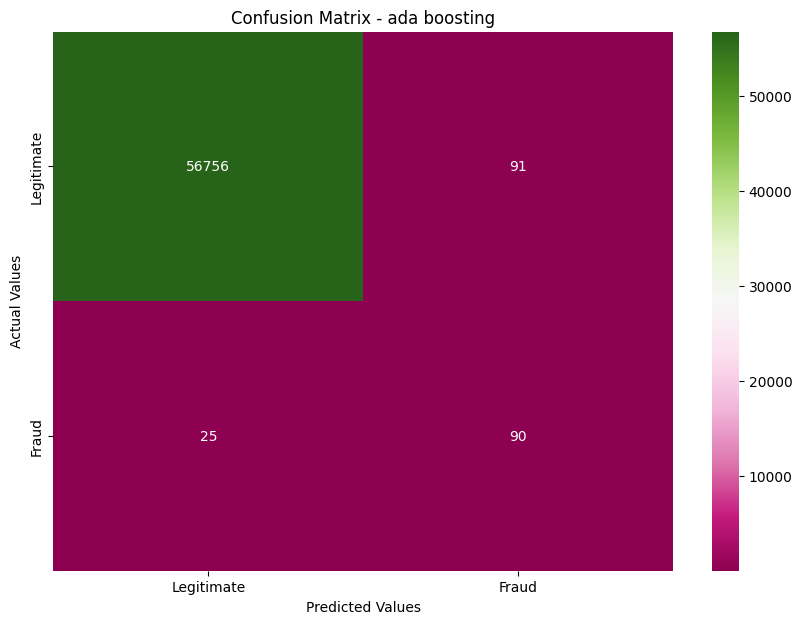

In [59]:
# Confusion Matrix for ada boosting
conmat_ada = confusion_matrix(test_y, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(conmat_ada, cmap='PiYG',annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - ada boosting')
ax.xaxis.set_ticklabels(['Legitimate','Fraud'])
ax.yaxis.set_ticklabels(['Legitimate','Fraud'])
plt.show()

## Gradient boostinf evaluation

In [64]:
# Printing Evaluation Metrics for Gradient Boosting
metrics_gb = [['Accuracy',(accuracy_score(test_y, y_prediction_gb))],
                         ['Precision',precision_score(test_y, y_prediction_gb)],
                         ['Recall', recall_score(test_y, y_prediction_gb)],
                         ['F1_score',f1_score(test_y, y_prediction_gb)]]
metrics_df_gb = pd.DataFrame(metrics_gb, columns = ['Metrics', 'Results'])
metrics_df_gb

,Metrics,Results
0,Accuracy,0.993592
1,Precision,0.227074
2,Recall,0.904348
3,F1_score,0.363002


In [55]:
evaluate_model(gradient_boosting, test_x, test_y)

Accuracy: 0.9935922193743197
ROC AUC: 0.9834343290648201

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56847
           1       0.23      0.90      0.36       115

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.68     56962
weighted avg       1.00      0.99      1.00     56962



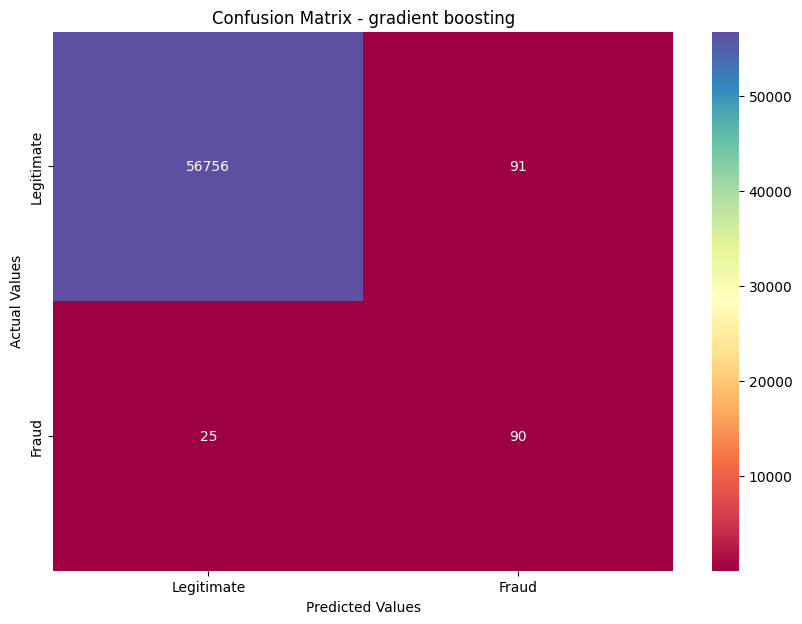

In [58]:
conmat_gra = confusion_matrix(test_y, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(conmat_gra, cmap='Spectral',annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - gradient boosting')
ax.xaxis.set_ticklabels(['Legitimate','Fraud'])
ax.yaxis.set_ticklabels(['Legitimate','Fraud'])
plt.show()

In [57]:
# Counting how many fraudulent and how many genuine transactions we have on the testing set
test_y.value_counts()


Class
0    56847
1      115
Name: count, dtype: int64

Considering we have 115 fraudulent transactions in our testing set, and the goal of our model is predicting these fraudulent transactions, we can realize that the model who best performed such task was **the random forest model** who predicted 99 fraudulent transactions out of 115, with a 86%% recall, which indicates how well our model detects fradulent transactions from our testing set.

### Results Visualization

In [65]:
# Printing ROC AUC scores
from sklearn.metrics import roc_auc_score
print('Random Forest ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_rf) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_dt) *100).round(2))
print('Ada Boost ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_ab) * 100).round(2))
print('Gradient Boost ROC AUC Score: ', (roc_auc_score(test_y, y_prediction_gb) * 100).round(2))

Random Forest ROC AUC Score:  93.03
Decision Tree ROC AUC Score:  89.05
Ada Boost ROC AUC Score:  95.14
Gradient Boost ROC AUC Score:  94.91


In [74]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_roc_curve(model, X_test, y_test, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()


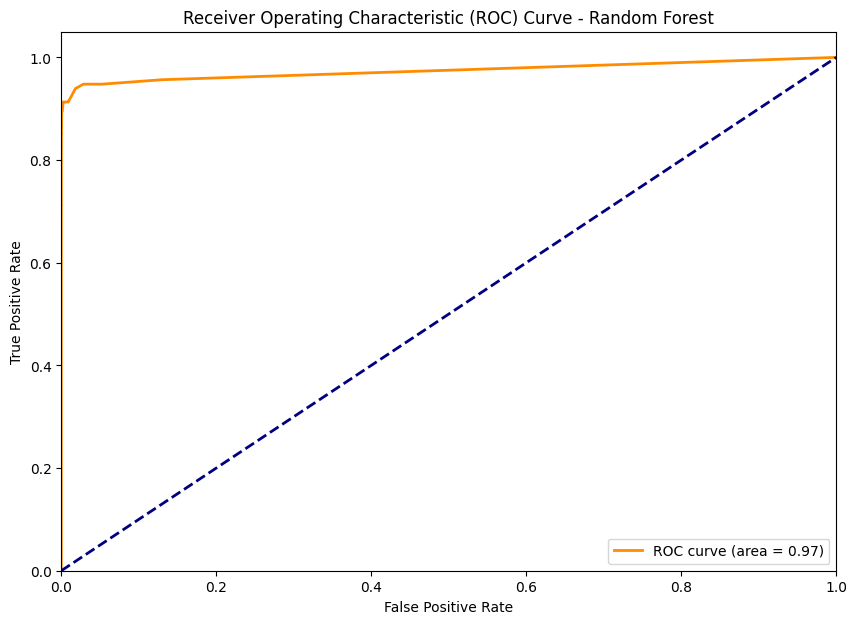

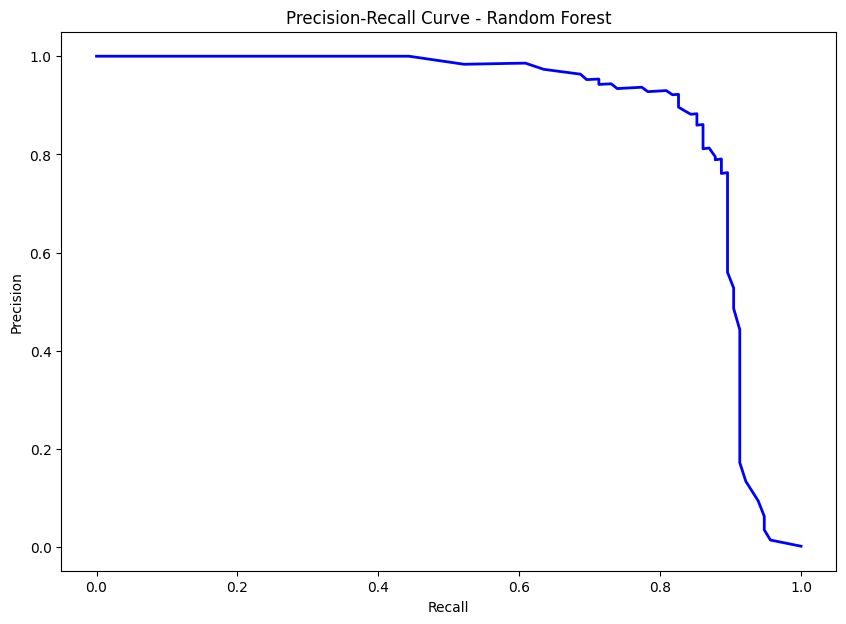

In [71]:
# Random Forest
plot_roc_curve(random_forest, test_x, test_y, 'Random Forest')
plot_precision_recall_curve(random_forest, test_x, test_y, 'Random Forest')



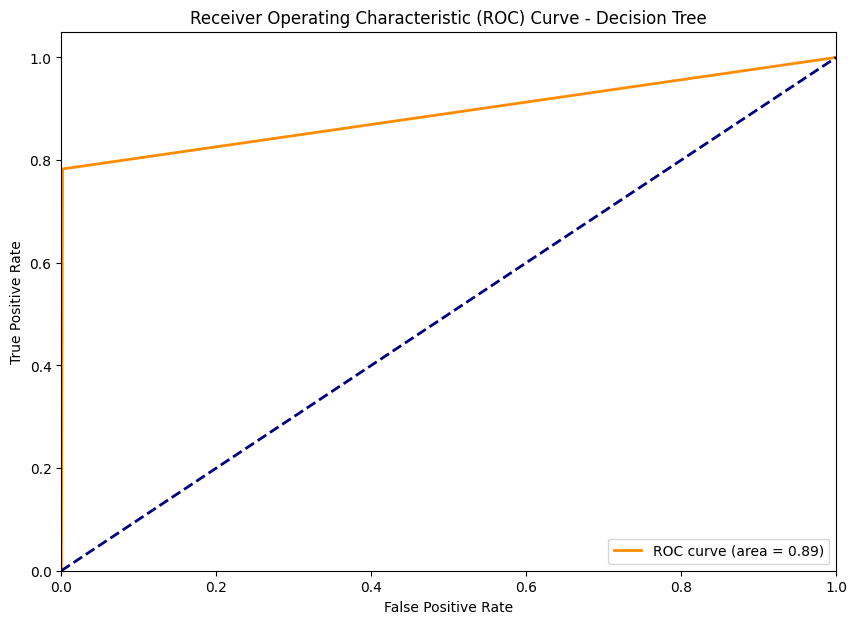

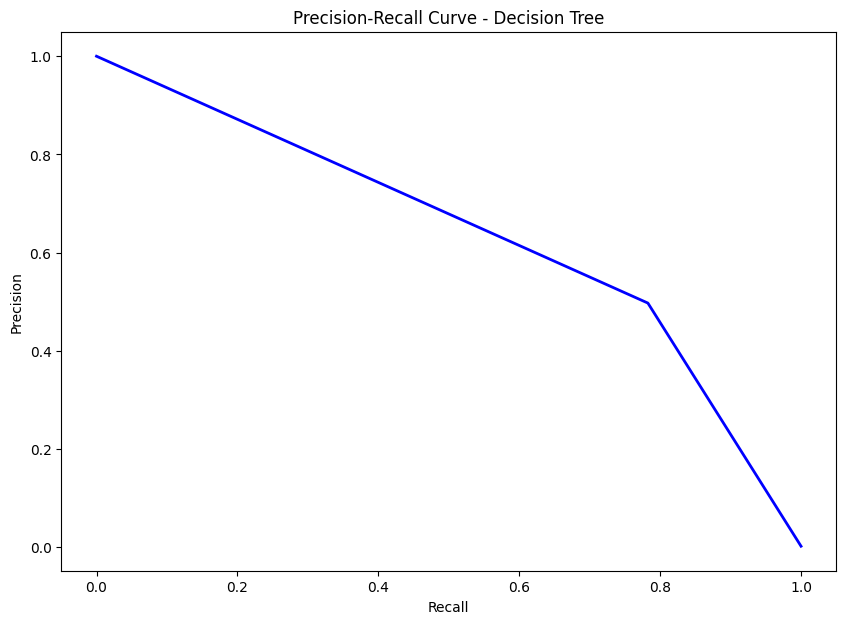

In [72]:
# Decision Tree
plot_roc_curve(decision_tree, test_x, test_y, 'Decision Tree')
plot_precision_recall_curve(decision_tree, test_x, test_y, 'Decision Tree')


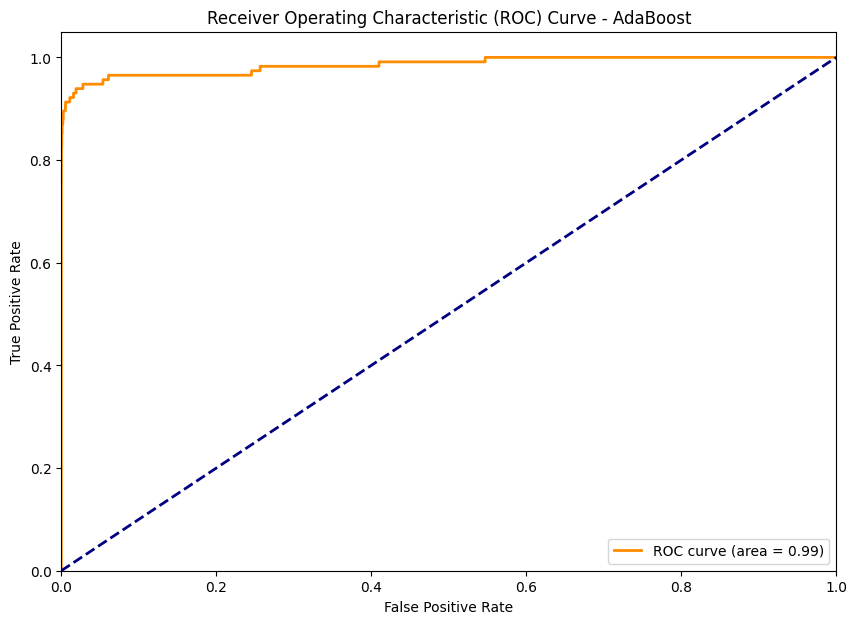

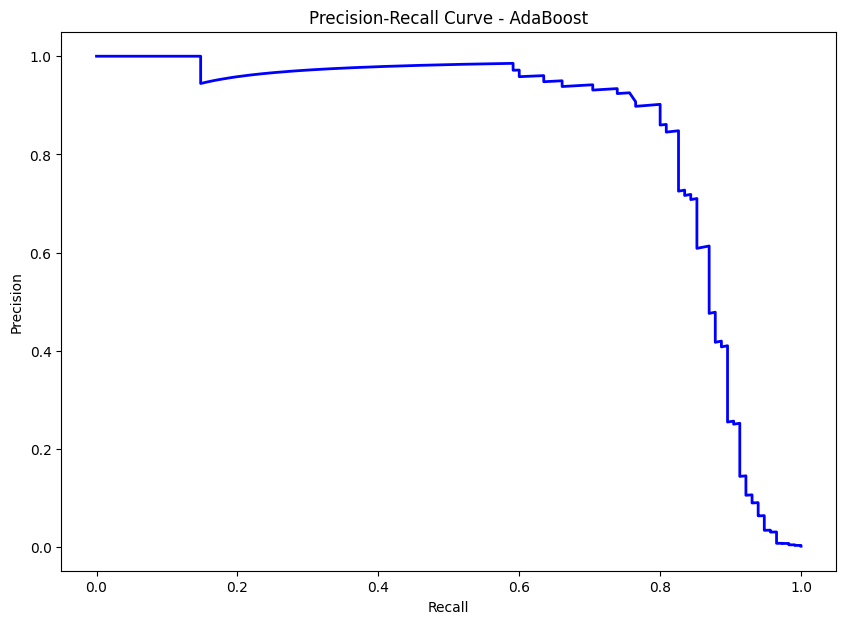

In [75]:
plot_roc_curve(ada_boost, test_x, test_y, 'AdaBoost')
plot_precision_recall_curve(ada_boost, test_x, test_y, 'AdaBoost')


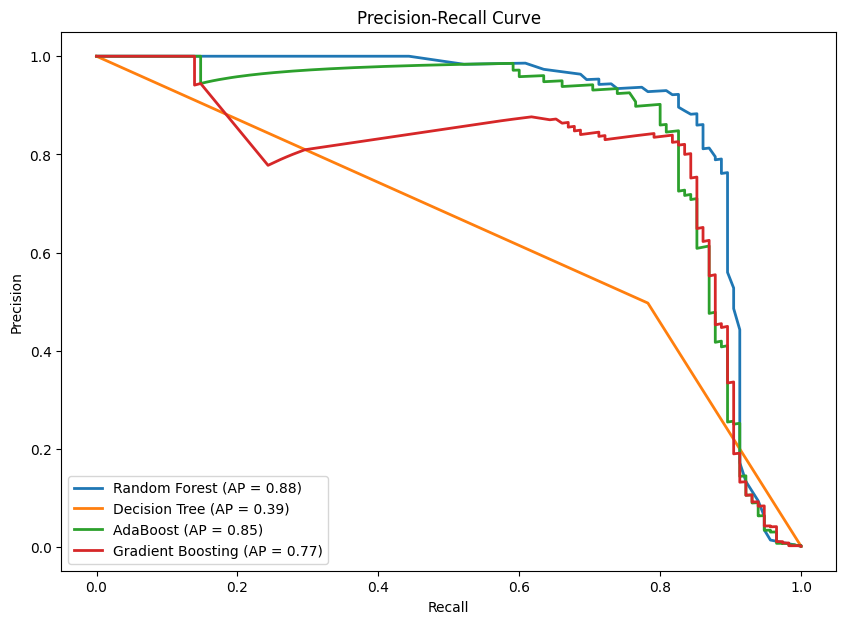

In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        avg_precision = average_precision_score(y_test, y_proba)

        plt.plot(recall, precision, lw=2, label=f'{model_name} (AP = {avg_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="best")
    plt.show()

# Dictionary of models
models = {
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'AdaBoost': ada_boost,
    'Gradient Boosting': gradient_boosting
}

# Plotting the Precision-Recall curve for all models
plot_precision_recall_curve(models, test_x, test_y)


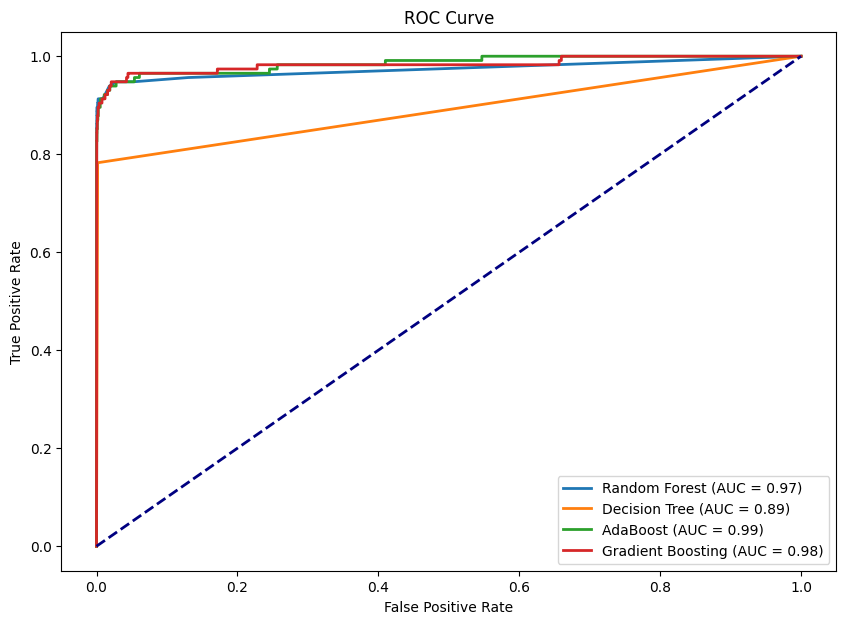

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 7))

    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="best")
    plt.show()

# Dictionary of models
models = {
    'Random Forest': random_forest,
    'Decision Tree': decision_tree,
    'AdaBoost': ada_boost,
    'Gradient Boosting': gradient_boosting
}

# Plotting the ROC curve for all models
plot_roc_curve(models, test_x, test_y)
